In [1]:
import pandas as pd
import os
import openai
import json

In [2]:
df_path = "data/NU_340297544_01AGO2023_31AGO2023.csv"
df = pd.read_csv(df_path, sep=",", encoding="latin-1")
df = df.rename({'DescriÃÂ§ÃÂ£o': 'Descricao'}, axis = 1)
df.head()

,Data,Valor,Identificador,Descricao
0,03/08/2023,-4.0,64cb88e6-f81f-4b43-b9f8-dc1dc8f7d379,Compra no dÃÂ©bito - Suco Tal
1,03/08/2023,-9.9,64cbc2f3-9d0d-4795-8af0-b6910dc280ed,Compra no dÃÂ©bito - Mc Donalds
2,03/08/2023,-3.5,64cc3384-dde7-492f-b0e7-dab258bd4417,Compra no dÃÂ©bito - Dellicata Paes e Tenta
3,04/08/2023,800.0,64cd05e2-bd32-4023-bc2e-b94b77507cc6,TransferÃÂªncia recebida pelo Pix - WYNK SOLU...
4,04/08/2023,-2.5,64cd1991-67bf-4908-9804-ba7d5fa79446,TransferÃÂªncia enviada pelo Pix - Samuel Mot...


In [3]:
def get_api_key():
    with open('API_KEY.txt', 'r') as file:
        api_key = file.read().strip()
    return api_key

In [19]:
import openai
import os
import time

def get_ai_response(description):
    openai.api_key = get_api_key()


    # Create a prompt
    prompt = """I'll give you a description in portuguese-br, and you will give me the corresponding categories. 
    Possible Categories:( 'Alimentacao', 'Pix enviado', 'Pix recebido', 'Outros', 'Compras online', 'Pagar Fatura'). 
    Give me only 1 categorie, and your output needs to be only the vategorie string Description:\n""" + "\n".join(description)

    # Make an API call for the current batch
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=150,
        temperature=0
    )

    response = response.choices[0].text.strip()
    categorie = response.split("\n")[-1].strip() 

    # Pause for a minute to respect the rate limit
    time.sleep(25)

    return categorie

In [3]:
new_df = pd.read_csv('data/fine_tuning_data.csv', sep=",")

In [4]:

df['Categoria'] = new_df['completion']

In [5]:
# excluindo coluna desnececessaria
df = df.drop(['Identificador'], axis=1)

In [6]:
# separando a coluna de data em dia, mes e ano
df['Dia'] = df['Data'].str.split('/').str[0]
df['Mes'] = df['Data'].str.split('/').str[1]
df['Ano'] = df['Data'].str.split('/').str[2]
df = df.drop(['Data'], axis=1)

In [7]:
df

,Valor,Descricao,Categoria,Dia,Mes,Ano
0,-4.00,Compra no dÃÂ©bito - Suco Tal,Alimentacao,03,08,2023
1,-9.90,Compra no dÃÂ©bito - Mc Donalds,Alimentacao,03,08,2023
2,-3.50,Compra no dÃÂ©bito - Dellicata Paes e Tenta,Alimentacao,03,08,2023
3,800.00,TransferÃÂªncia recebida pelo Pix - WYNK SOLU...,Pix recebido,04,08,2023
4,-2.50,TransferÃÂªncia enviada pelo Pix - Samuel Mot...,Pix enviado,04,08,2023
5,-610.72,Pagamento de fatura,Pagar Fatura,04,08,2023
6,-4.42,Compra no dÃÂ©bito - Dellicata Paes e Tenta,Alimentacao,04,08,2023
7,-25.00,TransferÃÂªncia enviada pelo Pix - Nilza Paes...,Pix enviado,05,08,2023
8,-2.16,TransferÃÂªncia enviada pelo Pix - Samuel Mot...,Pix enviado,05,08,2023
9,-50.00,AplicaÃÂ§ÃÂ£o RDB,Outros,05,08,2023


/tmp/ipykernel_9310/2927634258.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90);


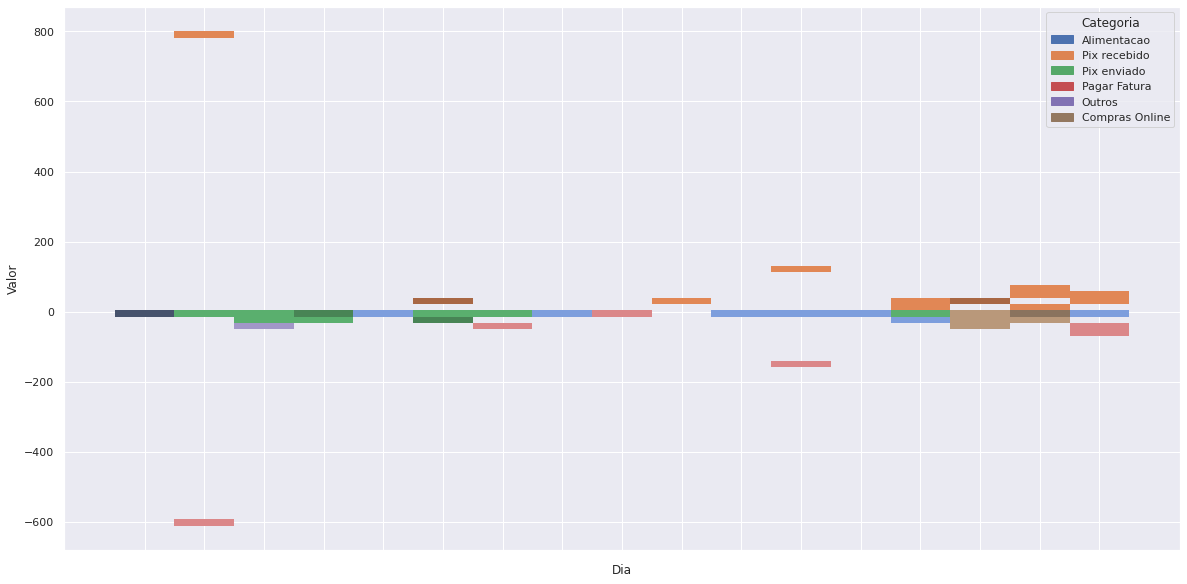

In [25]:
import seaborn as sns
plot = sns.histplot(x='Dia', y='Valor', hue='Categoria',data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

<AxesSubplot:xlabel='Dia', ylabel='Valor'>

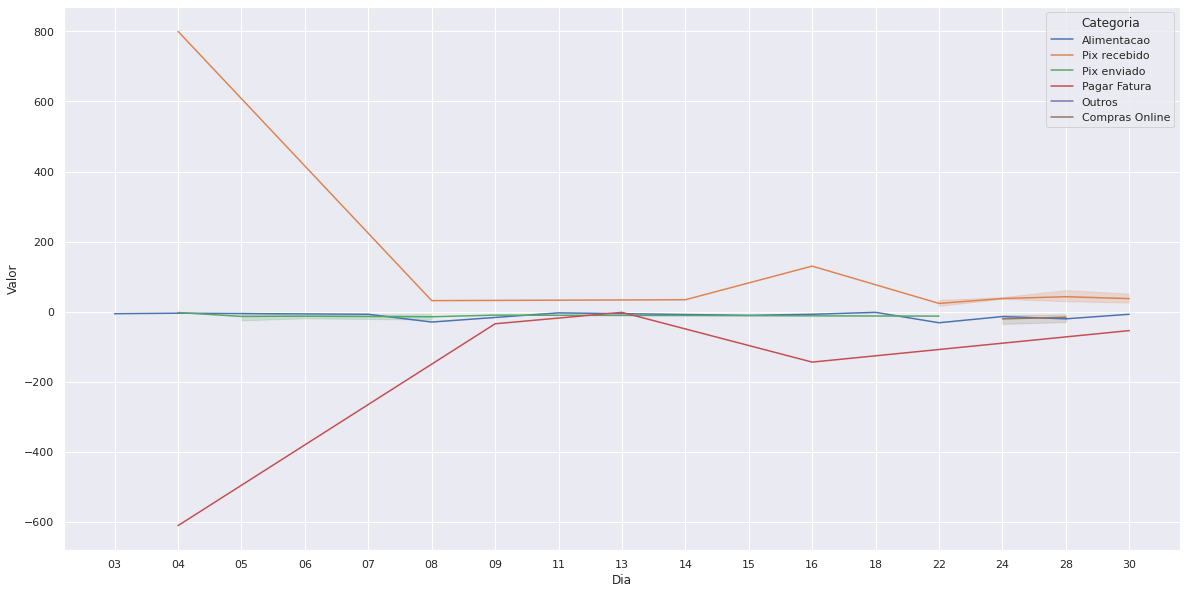

In [10]:
# remover temporariamente outliers, com valor > 500 ou < -500



# ver gastos ao longo do tempo 
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x="Dia", y="Valor", data=df, hue="Categoria")

